# Sigmoid Activation Function

Let $z=\vec{w}\cdot\vec{x} + \vec{b}$. Then the **sigmoid activation function** is mathematically defined as
$$\sigma(z)=\frac{1}{1+e^{-z}}$$ 
where,
- $\vec{w}=$ all the weights in the network
- $\vec{b}=$ all the biases in the network
- $\vec{x}=$ the input vector

## Forward Propagation with Sigmoid Activation Function

`forward_propagation(input_data, weights, bias)` computes the forward propagation operation of a perceptron and returns the output after applying the `sigmoid(x)`

In [1]:
import numpy as np

def sigmoid(x):
    "The sigmoid activation function"
    return 1 / (1 + np.exp(-x))

def forward_propagation(input_data: np.ndarray, weights: np.ndarray, bias: np.ndarray) -> np.ndarray:
    """Performs the forward propagation step in a neural network layer.

    Args:
        input_data: The input data or activations from the previous layer. 
                                    It should be a 1D or 2D array where each row represents a data sample.
        weights: The weights associated with the connections between the neurons of the current layer 
                                 and the previous layer. It should be a 2D array where each column corresponds to a neuron 
                                 in the current layer.
        bias: The bias terms for the neurons in the current layer. It should be a 1D array where each element 
                              corresponds to a neuron in the current layer.

    Returns:
        numpy.ndarray: The output of the current layer after applying the activation function (sigmoid in this case).
    """
    # take the dot product of input and weight and add the bias
    return sigmoid(np.dot(input_data, weights) + bias)

In [2]:
# Initialize parameters
X = np.array([2, 3]) # declaring two (input?) data points
Y = np.array([0]) # label
weights = np.array([2.0, 3.0]) # weights of perceptron
bias = 0.1 # bias value
output = forward_propagation(X, weights.T, bias) # predicted label
print("Forward propagation output:", output)

Y_predicted = (output > 0.5) * 1 ## apply sigmoid activation
print("Label:", Y_predicted)

Forward propagation output: 0.9999979547735586
Label: 1


## Visualization

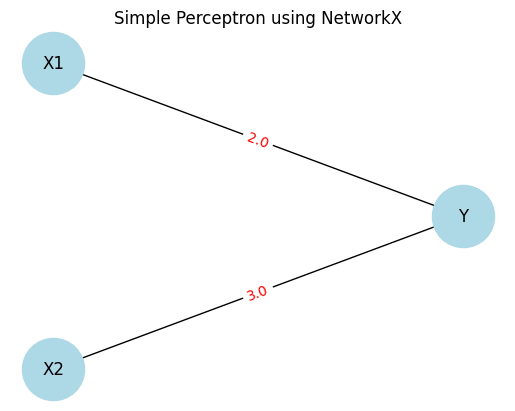

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes with layer information
G.add_node('X1', layer=0)
G.add_node('X2', layer=0)
G.add_node('Y', layer=1)

# Add edges with weights
G.add_edge('X1', 'Y', weight=2.0)
G.add_edge('X2', 'Y', weight=3.0)

pos = {}
pos['X1'] = (0, 1)
pos['X2'] = (0, -1)
pos['Y'] = (1, 0)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Draw edges
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='->', arrowsize=20)

# Draw edge labels (weights)
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('Simple Perceptron using NetworkX')
plt.axis('off')
plt.show()